# Machine Learning - MDP Problem 1 (small)

## 1. Import Modules

In [232]:
import hiive.mdptoolbox
import hiive.mdptoolbox.mdp
import hiive.mdptoolbox.example
import numpy as np
import matplotlib.pyplot as plt
import time

## 2. MDP Forest Management Problem

### 2.1. FM With Low Fire Occurance (Default)

In [233]:
P,R = hiive.mdptoolbox.example.forest(S=5, r1=4, r2=2, p=0.1, is_sparse=False)

In [234]:
P

array([[[0.1, 0.9, 0. , 0. , 0. ],
        [0.1, 0. , 0.9, 0. , 0. ],
        [0.1, 0. , 0. , 0.9, 0. ],
        [0.1, 0. , 0. , 0. , 0.9],
        [0.1, 0. , 0. , 0. , 0.9]],

       [[1. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. ],
        [1. , 0. , 0. , 0. , 0. ]]])

In [235]:
R

array([[0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [4., 2.]])

#### 2.1.1. FM Value Iteration

In [236]:
discount = [0.5, 0.6, 0.7, 0.8, 0.9]
for i in discount:
    vi = hiive.mdptoolbox.mdp.ValueIteration(transitions=P, reward=R, gamma=i, epsilon=0.01, max_iter=1000, initial_value=0)
    vi.setVerbose()
    vi.run()

 Iteration   Variation
         1    4.000000
         2    1.800000
         3    0.810000
         4    0.364500
         5    0.164025
         6    0.073811
         7    0.033215
         8    0.014947
Iterating stopped due to maximum number of iterations condition.
 Iteration   Variation
         1    4.000000
         2    2.160000
         3    1.166400
         4    0.629856
         5    0.340122
         6    0.183666
         7    0.099180
         8    0.053557
         9    0.028921
        10    0.015617
        11    0.008433
Iterating stopped due to maximum number of iterations condition.
 Iteration   Variation
         1    4.000000
         2    2.520000
         3    1.587600
         4    1.000188
         5    0.630118
         6    0.249929
         7    0.000000
Iterating stopped, epsilon-optimal policy found.
 Iteration   Variation
         1    4.000000
         2    2.880000
         3    2.073600
         4    1.492992
         5    1.074954
         6    0.

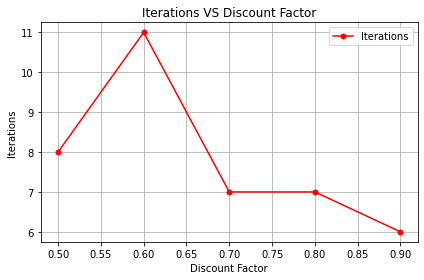

In [237]:
discount = [0.5, 0.6, 0.7, 0.8, 0.9]
iters = [8,11,7,7,6]

plt.plot(discount, iters, color='red', marker='o', markersize=5, label='Iterations')
plt.grid()
plt.title("Iterations VS Discount Factor")
plt.xlabel("Discount Factor")
plt.ylabel("Iterations")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [238]:
vi = hiive.mdptoolbox.mdp.ValueIteration(transitions=P, reward=R, gamma=0.9, epsilon=0.01, max_iter=1000, initial_value=0)
vi.setVerbose()
vi.run()

 Iteration   Variation
         1    4.000000
         2    3.240000
         3    2.624400
         4    1.656100
         5    1.341441
         6    0.000000
Iterating stopped, epsilon-optimal policy found.


[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 0.0003066062927246094,
  'Max V': 4.0,
  'Mean V': 1.4,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 7.24,
  'Error': 3.24,
  'Time': 0.000997304916381836,
  'Max V': 7.24,
  'Mean V': 2.6580000000000004,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 9.9373,
  'Error': 2.6244,
  'Time': 0.000997304916381836,
  'Max V': 9.9373,
  'Mean V': 4.23676,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 12.128674,
  'Error': 1.6561000000000003,
  'Time': 0.000997304916381836,
  'Max V': 12.128674,
  'Mean V': 5.7780494000000004,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 13.957421530000001,
  'Error': 1.3414410000000005,
  'Time': 0.0019943714141845703,
  'Max V': 13.957421530000001,
  'Mean V': 7.338508730000001,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward': 15.482564617000001,
  'Error': 3.552713678800501e-15,
  'Ti

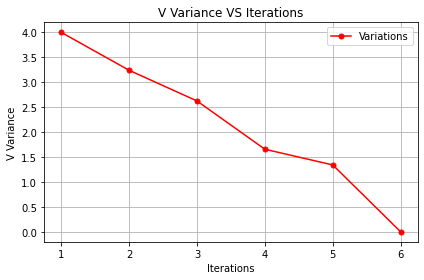

In [241]:
variations = [4,3.240000,2.624400,1.656100,1.341441,0.000000]
iters = [1,2,3,4,5,6]

plt.plot(iters, variations, color='red', marker='o', markersize=5, label='Variations')
plt.grid()
plt.title("V Variance VS Iterations")
plt.xlabel("Iterations")
plt.ylabel("V Variance")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [186]:
vi.V

(2.0573777307735357,
 2.7471385775529304,
 2.9649194316079104,
 4.76491943160791,
 8.764919431607911)

In [187]:
vi.policy

(0, 1, 0, 0, 0)

In [188]:
vi.iter

11

In [189]:
vi.time

0.004987001419067383

#### 2.1.2. FM Policy Iteration

In [13]:
discount = [0.5, 0.6, 0.7, 0.8, 0.9]
for i in discount:
    pi = hiive.mdptoolbox.mdp.PolicyIterationModified(transitions=P, reward=R, gamma=i, epsilon=0.01, max_iter=10)
    pi.setVerbose()
    pi.run()

 Iteration   Variation
         1    4.000000
         2    2.016759
         3    0.218394
         4    0.000124
 Iteration   Variation
         1    4.000000
         2    3.279542
         3    1.122715
         4    0.000387
 Iteration   Variation
         1    4.000000
         2    5.116931
         3    2.630474
         4    1.044069
         5    0.000000
 Iteration   Variation
         1    4.000000
         2    7.972339
         3    5.323337
         4    3.254326
         5    0.000000
 Iteration   Variation
         1    4.000000
         2   12.697463
         3   10.767637
         4    8.265419
         5    0.000000


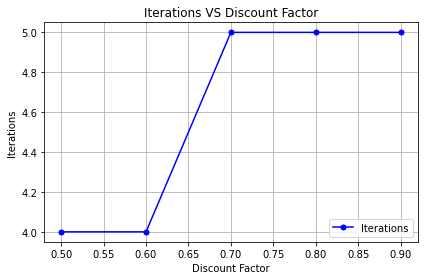

In [14]:
discount = [0.5, 0.6, 0.7, 0.8, 0.9]
iters = [4,4,5,5,5]

plt.plot(discount, iters, color='blue', marker='o', markersize=5, label='Iterations')
plt.grid()
plt.title("Iterations VS Discount Factor")
plt.xlabel("Discount Factor")
plt.ylabel("Iterations")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [15]:
pi = hiive.mdptoolbox.mdp.PolicyIterationModified(transitions=P, reward=R, gamma=0.9, epsilon=0.01, max_iter=10)
pi.setVerbose()
pi.run()

 Iteration   Variation
         1    4.000000
         2   12.697463
         3   10.767637
         4    8.265419
         5    0.000000


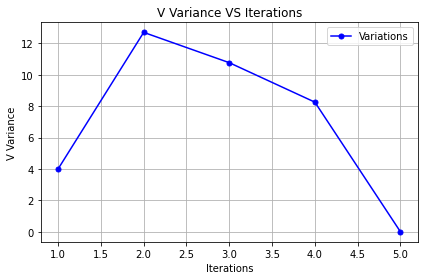

In [16]:
variations = [4,12.697463,10.767637,8.254991,0.000000]
iters = [1,2,3,4,5]

plt.plot(iters, variations, color='blue', marker='o', markersize=5, label='Variations')
plt.grid()
plt.title("V Variance VS Iterations")
plt.xlabel("Iterations")
plt.ylabel("V Variance")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [17]:
pi.V

(15.068555055995633,
 17.19431905599563,
 19.818719055995633,
 23.058719055995635,
 27.058719055995635)

In [18]:
pi.policy

(0, 0, 0, 0, 0)

In [19]:
pi.iter

5

In [20]:
pi.time

0.0029654502868652344

#### 2.1.3. FM Q-Learning

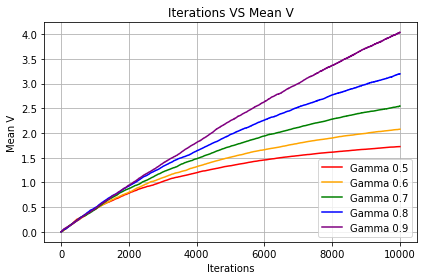

In [247]:
discount_list_one=[]
discount_list_two=[]
discount_list_three=[]
discount_list_four=[]
discount_list_five=[]

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.5, alpha=0.1, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.3, epsilon_min=0.001, epsilon_decay=0.01, n_iter=10000)
for i in qi.run():
    discount_list_one.append(i['Mean V'])

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.6, alpha=0.1, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.3, epsilon_min=0.001, epsilon_decay=0.01, n_iter=10000)
for i in qi.run():
    discount_list_two.append(i['Mean V'])

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.7, alpha=0.1, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.3, epsilon_min=0.001, epsilon_decay=0.01, n_iter=10000)
for i in qi.run():
    discount_list_three.append(i['Mean V'])

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.8, alpha=0.1, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.3, epsilon_min=0.001, epsilon_decay=0.01, n_iter=10000)
for i in qi.run():
    discount_list_four.append(i['Mean V'])

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.1, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.3, epsilon_min=0.001, epsilon_decay=0.01, n_iter=10000)
for i in qi.run():
    discount_list_five.append(i['Mean V'])
    

iters = [i for i in range(1,10001)]

plt.plot(iters, discount_list_one, color='red', label='Gamma 0.5')
plt.plot(iters, discount_list_two, color='orange', label='Gamma 0.6')
plt.plot(iters, discount_list_three, color='green', label='Gamma 0.7')
plt.plot(iters, discount_list_four, color='blue', label='Gamma 0.8')
plt.plot(iters, discount_list_five, color='purple', label='Gamma 0.9')
plt.grid()
plt.title("Iterations VS Mean V")
plt.xlabel("Iterations")
plt.ylabel("Mean V")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

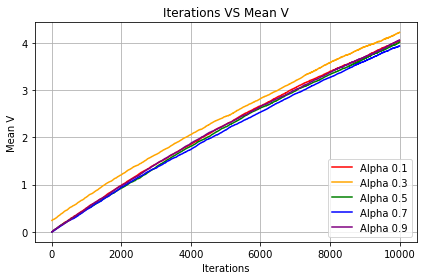

In [271]:
discount_list_one=[]
discount_list_two=[]
discount_list_three=[]
discount_list_four=[]
discount_list_five=[]

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.1, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.01, epsilon_min=0.001, epsilon_decay=0.01, n_iter=10000)
for i in qi.run():
    discount_list_one.append(i['Mean V'])

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.3, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.01, epsilon_min=0.001, epsilon_decay=0.01, n_iter=10000)
for i in qi.run():
    discount_list_two.append(i['Mean V'])

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.5, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.01, epsilon_min=0.001, epsilon_decay=0.01, n_iter=10000)
for i in qi.run():
    discount_list_three.append(i['Mean V'])

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.7, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.01, epsilon_min=0.001, epsilon_decay=0.01, n_iter=10000)
for i in qi.run():
    discount_list_four.append(i['Mean V'])

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.9, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.01, epsilon_min=0.001, epsilon_decay=0.01, n_iter=10000)
for i in qi.run():
    discount_list_five.append(i['Mean V'])
    

iters = [i for i in range(1,10001)]

plt.plot(iters, discount_list_one, color='red', label='Alpha 0.1')
plt.plot(iters, discount_list_two, color='orange', label='Alpha 0.3')
plt.plot(iters, discount_list_three, color='green', label='Alpha 0.5')
plt.plot(iters, discount_list_four, color='blue', label='Alpha 0.7')
plt.plot(iters, discount_list_five, color='purple', label='Alpha 0.9')
plt.grid()
plt.title("Iterations VS Mean V")
plt.xlabel("Iterations")
plt.ylabel("Mean V")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

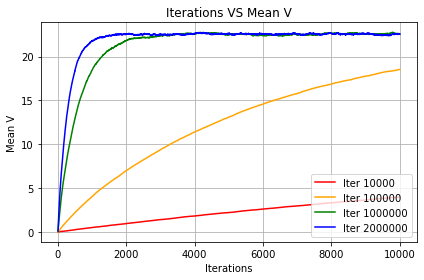

In [272]:
discount_list_one=[]
discount_list_two=[]
discount_list_three=[]
discount_list_four=[]

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.3, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.01, epsilon_min=0.001, epsilon_decay=0.01, n_iter=10000)
for i in qi.run():
    discount_list_one.append(i['Mean V'])

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.3, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.01, epsilon_min=0.001, epsilon_decay=0.01, n_iter=100000)
for i in qi.run():
    discount_list_two.append(i['Mean V'])

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.3, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.01, epsilon_min=0.001, epsilon_decay=0.01, n_iter=1000000)
for i in qi.run():
    discount_list_three.append(i['Mean V'])

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.3, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.01, epsilon_min=0.001, epsilon_decay=0.01, n_iter=2000000)
for i in qi.run():
    discount_list_four.append(i['Mean V'])
    

iters = [i for i in range(1,10001)]

plt.plot(iters, discount_list_one, color='red', label='Iter 10000')
plt.plot(iters, discount_list_two, color='orange', label='Iter 100000')
plt.plot(iters, discount_list_three, color='green', label='Iter 1000000')
plt.plot(iters, discount_list_four, color='blue', label='Iter 2000000')
plt.grid()
plt.title("Iterations VS Mean V")
plt.xlabel("Iterations")
plt.ylabel("Mean V")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [319]:
qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.3, alpha_decay=0.01, alpha_min=0.001, 
                                    epsilon=0.01, epsilon_min=0.001, epsilon_decay=0.01, n_iter=2000000)
qi.run()

[{'State': 4,
  'Action': 0,
  'Reward': 4.0,
  'Error': 0.0039916313695848235,
  'Time': 0.008977174758911133,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.9,
  'Max V': 0.08767793552135433,
  'Mean V': 0.017585825004103692,
  'Iteration': 200},
 {'State': 4,
  'Action': 0,
  'Reward': 4.0,
  'Error': 0.003984922550367771,
  'Time': 0.014973878860473633,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.9,
  'Max V': 0.1547594188726619,
  'Mean V': 0.031122944156971994,
  'Iteration': 400},
 {'State': 2,
  'Action': 0,
  'Reward': 0.0,
  'Error': 1.7868985347846087e-06,
  'Time': 0.020943880081176758,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.9,
  'Max V': 0.213132217799003,
  'Mean V': 0.04303527942926384,
  'Iteration': 600},
 {'State': 1,
  'Action': 0,
  'Reward': 0.0,
  'Error': 1.333042974435065e-09,
  'Time': 0.026927471160888672,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.9,
  'Max V': 0.2282569829275438,
  'Mean V': 0.04625775203172745,
  'Iteration': 

In [320]:
qi.Q

array([[1.69706528, 0.58644274],
       [2.06656451, 0.56430363],
       [2.88877772, 0.28489955],
       [4.68989305, 0.12837723],
       [8.74016772, 0.23083165]])

In [321]:
qi.V

(1.6970652818436915,
 2.066564510852598,
 2.888777722894273,
 4.689893048477474,
 8.74016772092099)

In [322]:
qi.policy

(0, 0, 0, 0, 0)

In [323]:
qi.time

55.71352767944336

### 2.2. FM With High Fire Occurance

In [288]:
P,R = hiive.mdptoolbox.example.forest(S=5, r1=4, r2=2, p=0.5, is_sparse=False)

In [289]:
vi = hiive.mdptoolbox.mdp.ValueIteration(transitions=P, reward=R, gamma=0.9, epsilon=0.3, max_iter=1000, initial_value=0)
vi.setVerbose()
vi.run()

 Iteration   Variation
         1    4.000000
         2    1.800000
         3    0.810000
         4    0.364500
         5    0.164025
         6    0.073811
Iterating stopped due to maximum number of iterations condition.


[{'State': None,
  'Action': None,
  'Reward': 4.0,
  'Error': 4.0,
  'Time': 0.0,
  'Max V': 4.0,
  'Mean V': 1.4,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 5.8,
  'Error': 1.7999999999999998,
  'Time': 0.0009982585906982422,
  'Max V': 5.8,
  'Mean V': 2.0100000000000002,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 6.8125,
  'Error': 0.8100000000000003,
  'Time': 0.0009982585906982422,
  'Max V': 6.8125,
  'Mean V': 2.6175,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 7.359249999999999,
  'Error': 0.3644999999999998,
  'Time': 0.0009982585906982422,
  'Max V': 7.359249999999999,
  'Mean V': 2.9637749999999996,
  'Iteration': 4},
 {'State': None,
  'Action': None,
  'Reward': 7.728306249999999,
  'Error': 0.16402499999999998,
  'Time': 0.0019953250885009766,
  'Max V': 7.728306249999999,
  'Mean V': 3.269822499999999,
  'Iteration': 5},
 {'State': None,
  'Action': None,
  'Reward': 7.9866456249999995,
  'Error': 0.073

In [290]:
vi.V

(1.3338871875, 2.017815625, 2.186645625, 3.986645625, 7.9866456249999995)

In [291]:
vi.policy

(0, 1, 0, 0, 0)

In [292]:
vi.iter

6

In [293]:
vi.time

0.002994537353515625

In [294]:
pi = hiive.mdptoolbox.mdp.PolicyIterationModified(transitions=P, reward=R, gamma=0.9, epsilon=0.3, max_iter=10)
pi.setVerbose()
pi.run()

 Iteration   Variation
         1    4.000000
         2    2.018394
         3    0.218809
         4    0.000000


In [295]:
pi.V

(2.8641489461396126,
 3.5538041200289245,
 3.772612883105616,
 5.572612883105615,
 9.572612883105615)

In [296]:
pi.policy

(0, 1, 0, 0, 0)

In [297]:
pi.iter

4

In [298]:
pi.time

0.001987457275390625

In [309]:
qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.3, alpha_decay=0.01, alpha_min=0.001, 
                                    epsilon=0.01, epsilon_min=0.001, epsilon_decay=0.01, n_iter=2000000)
qi.run()

[{'State': 3,
  'Action': 0,
  'Reward': 0.0,
  'Error': 5.02017621077625e-05,
  'Time': 0.007979393005371094,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.9,
  'Max V': 0.0558593843230095,
  'Mean V': 0.011196291458695303,
  'Iteration': 200},
 {'State': 2,
  'Action': 0,
  'Reward': 0.0,
  'Error': 4.3967037503646784e-07,
  'Time': 0.014930486679077148,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.9,
  'Max V': 0.11129344296704811,
  'Mean V': 0.024356761758286664,
  'Iteration': 400},
 {'State': 3,
  'Action': 0,
  'Reward': 0.0,
  'Error': 1.5027054248486944e-06,
  'Time': 0.0219118595123291,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.9,
  'Max V': 0.11129344296704811,
  'Mean V': 0.036897317342074167,
  'Iteration': 600},
 {'State': 4,
  'Action': 0,
  'Reward': 4.0,
  'Error': 0.00398848133713028,
  'Time': 0.027898788452148438,
  'Alpha': 0.001,
  'Epsilon': 0.001,
  'Gamma': 0.9,
  'Max V': 0.13627881510886522,
  'Mean V': 0.05295410666600495,
  'Iteration':

In [310]:
qi.Q

array([[3.11287013e+00, 1.35900298e+00],
       [7.34127675e-01, 3.79496466e+00],
       [3.76607675e+00, 3.78856863e-03],
       [5.74830909e+00, 1.89592856e-02],
       [9.80390358e+00, 3.34071176e-02]])

In [311]:
qi.V

(3.112870126942731,
 3.7949646610759022,
 3.7660767479830497,
 5.74830908890768,
 9.803903576784174)

In [312]:
qi.policy

(0, 1, 0, 0, 0)

In [313]:
qi.time

53.47258019447327

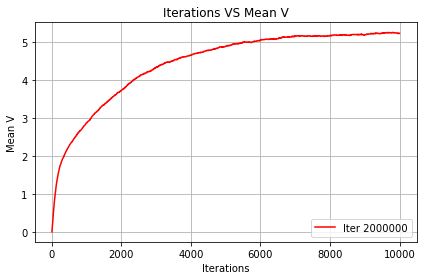

In [325]:
discount_list_one=[]

qi = hiive.mdptoolbox.mdp.QLearning(transitions=P, reward=R, gamma=0.9, alpha=0.3, alpha_decay=0.01, alpha_min=0.001,
             epsilon=0.01, epsilon_min=0.001, epsilon_decay=0.01, n_iter=2000000)
for i in qi.run():
    discount_list_one.append(i['Mean V'])
    

iters = [i for i in range(1,10001)]

plt.plot(iters, discount_list_one, color='red', label='Iter 2000000')
plt.grid()
plt.title("Iterations VS Mean V")
plt.xlabel("Iterations")
plt.ylabel("Mean V")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()